
Distribución objetivo por banda:
 Banda  Clientes  Defaults  No_Defaults Tasa_Default
     1       500       400          100        80.0%
     2      1200       200         1000        16.7%
     3      2400       120         2280         5.0%
     4      2800        60         2740         2.1%
     5      2300        20         2280         0.9%

Total clientes: 9,200
Total defaults: 800 (8.7%)

Generando datos sintéticos para 9,200 clientes...

Perfiles de ingreso recurrente por banda:
  Banda 1: Media = $500, Std = $200
  Banda 2: Media = $1,200, Std = $300
  Banda 3: Media = $2,500, Std = $500
  Banda 4: Media = $4,500, Std = $800
  Banda 5: Media = $7,500, Std = $1,500

✓ Dataset sintético generado con éxito

Primeras 10 filas del dataset:

VALIDACIÓN DEL DATASET GENERADO

Distribución real vs objetivo:
 Clientes_Real  Defaults_Real  Banda  Clientes_Objetivo  Defaults_Objetivo Tasa_Real Tasa_Objetivo
           500            400      1                500                400    

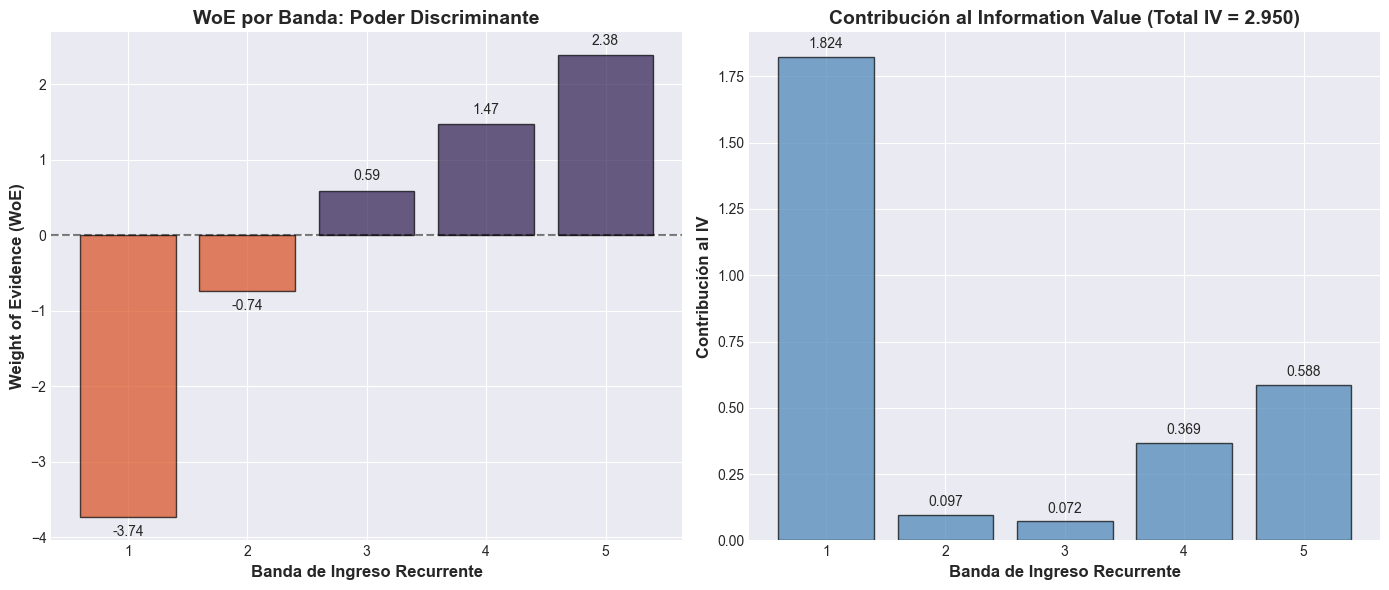


ROC CURVE Y AREA UNDER CURVE (AUC)

AUC Global: 0.799

Puntos de corte evaluados:

Umbral = 0.3:
  Sensibilidad (TPR): 0.994 → Detecta 99.4% de los defaults
  Especificidad: 0.218 → Clasifica bien 21.8% de los buenos
  FPR: 0.782 → Clasifica mal 78.2% de los buenos

Umbral = 0.5:
  Sensibilidad (TPR): 0.762 → Detecta 76.2% de los defaults
  Especificidad: 0.565 → Clasifica bien 56.5% de los buenos
  FPR: 0.435 → Clasifica mal 43.5% de los buenos

Umbral = 0.7:
  Sensibilidad (TPR): 0.635 → Detecta 63.5% de los defaults
  Especificidad: 0.849 → Clasifica bien 84.9% de los buenos
  FPR: 0.151 → Clasifica mal 15.1% de los buenos


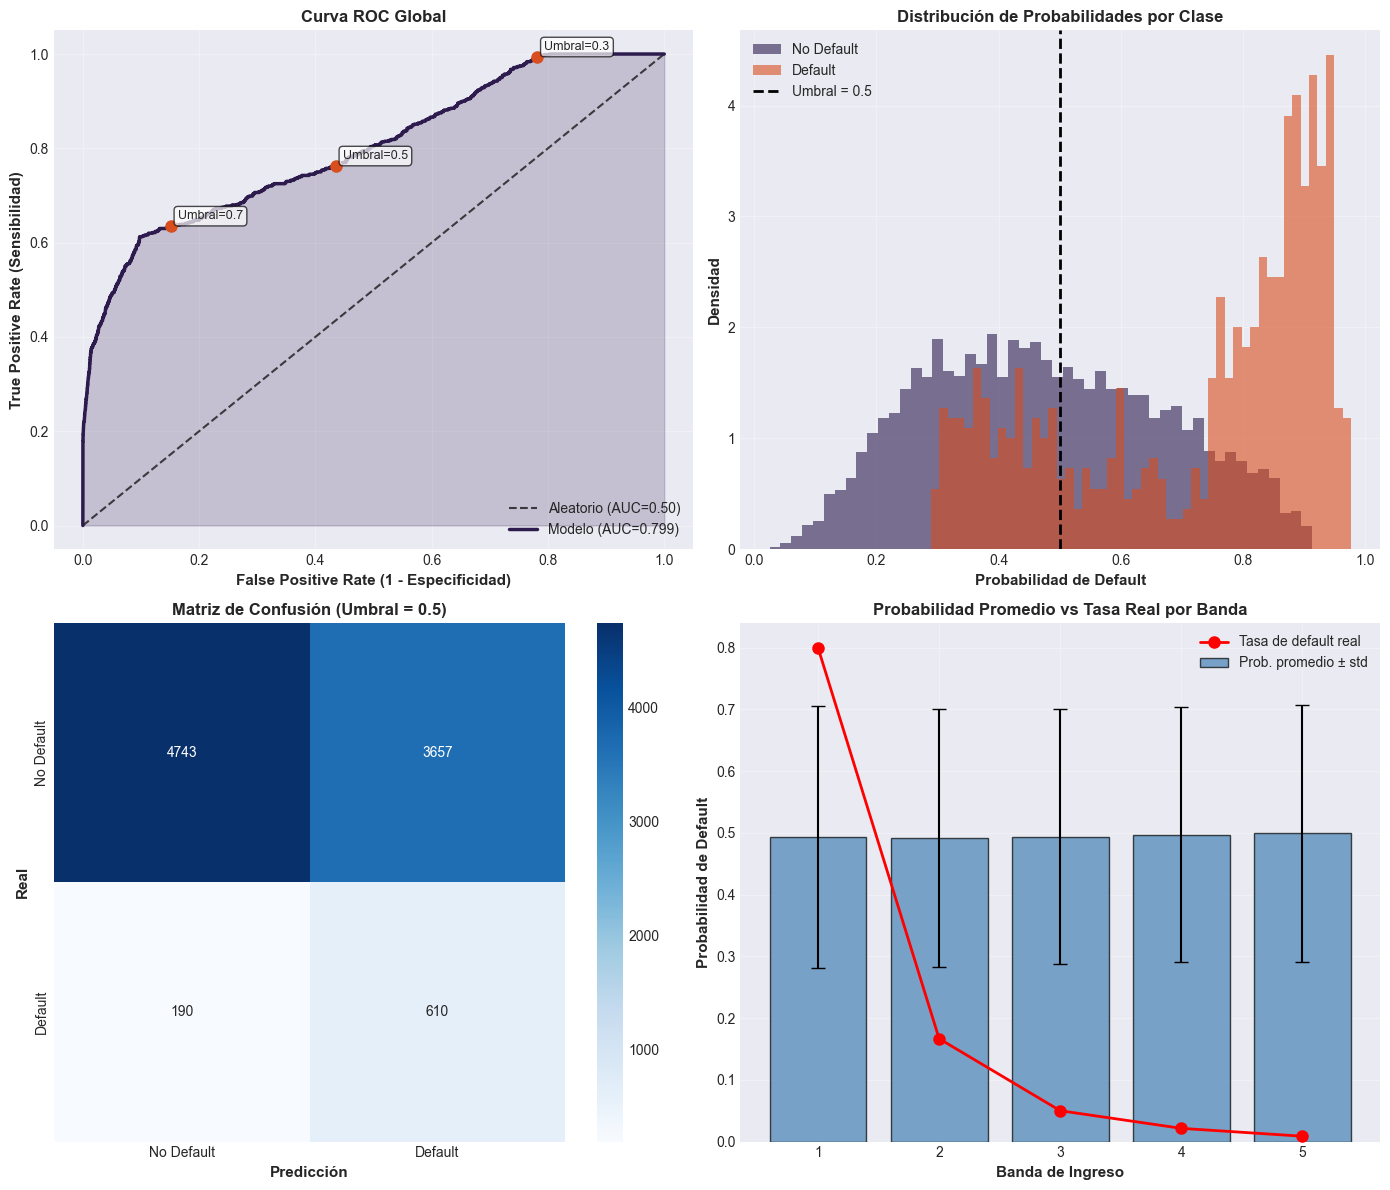


COEFICIENTE DE GINI Y CURVA DE LORENZ

Coeficiente de Gini: 0.545

Análisis de concentración:
  El 10% más riesgoso concentra el 0.0% de los defaults
  El 20% más riesgoso concentra el 0.6% de los defaults
  El 30% más riesgoso concentra el 7.9% de los defaults
  El 50% más riesgoso concentra el 21.2% de los defaults


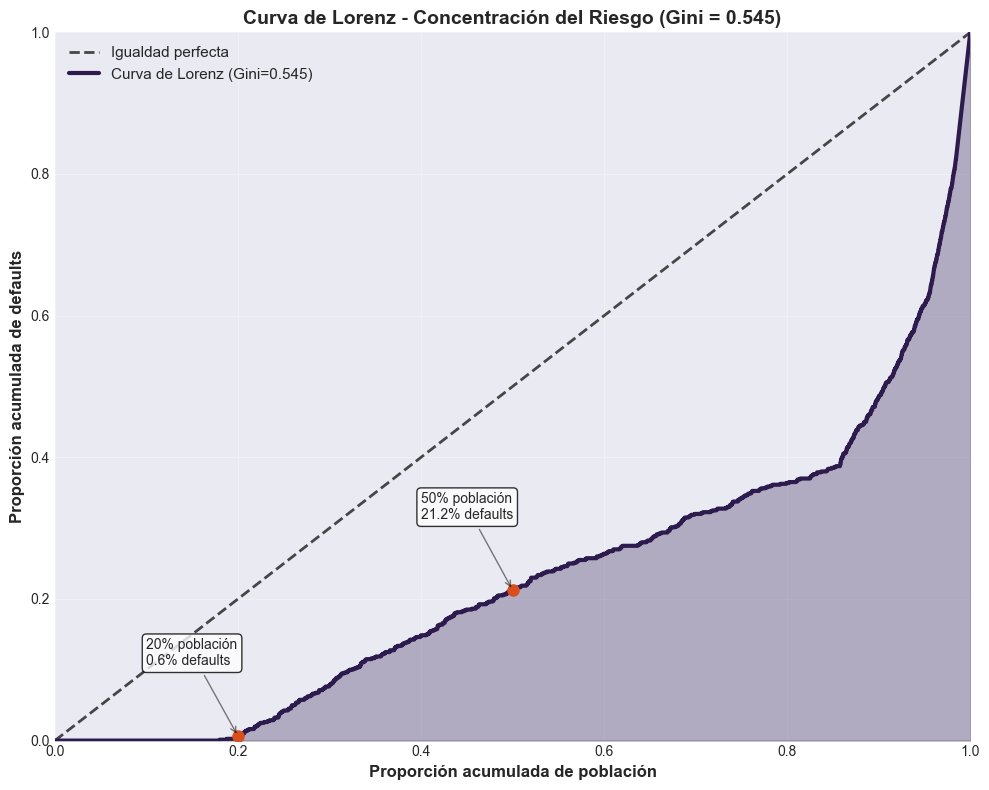


RESUMEN EJECUTIVO - ANÁLISIS DE RIESGO CREDITICIO

Dataset analizado: 9,200 clientes con 800 defaults (8.7%)

PRINCIPALES HALLAZGOS:

1. SEGMENTACIÓN POR INGRESO RECURRENTE
   - Variable clave: Ingreso recurrente mensual
   - 5 bandas con tasas de default desde 0.9% hasta 80%
   - Clara diferenciación de riesgo entre segmentos

2. PODER PREDICTIVO (Information Value)
   - IV = 2.950 (extremadamente alto)
   - La segmentación por ingreso tiene excelente poder discriminante
   - ⚠️ Riesgo de sobreajuste - validar en datos out-of-sample

3. CAPACIDAD DISCRIMINANTE (AUC)
   - AUC = 0.799 (excelente)
   - Con umbral 0.5: detecta 76.2% defaults, rechaza 43.5% buenos
   - Trade-off flexible según apetito de riesgo

4. CONCENTRACIÓN DEL RIESGO (Gini)
   - Gini = 0.545 (alta concentración)
   - 20% de clientes más riesgosos → 1% de defaults
   - Permite estrategias focalizadas de mitigación

MÉTRICAS DE VALIDACIÓN CONSOLIDADAS

Métrica                        Valor    Criterio        Estado    

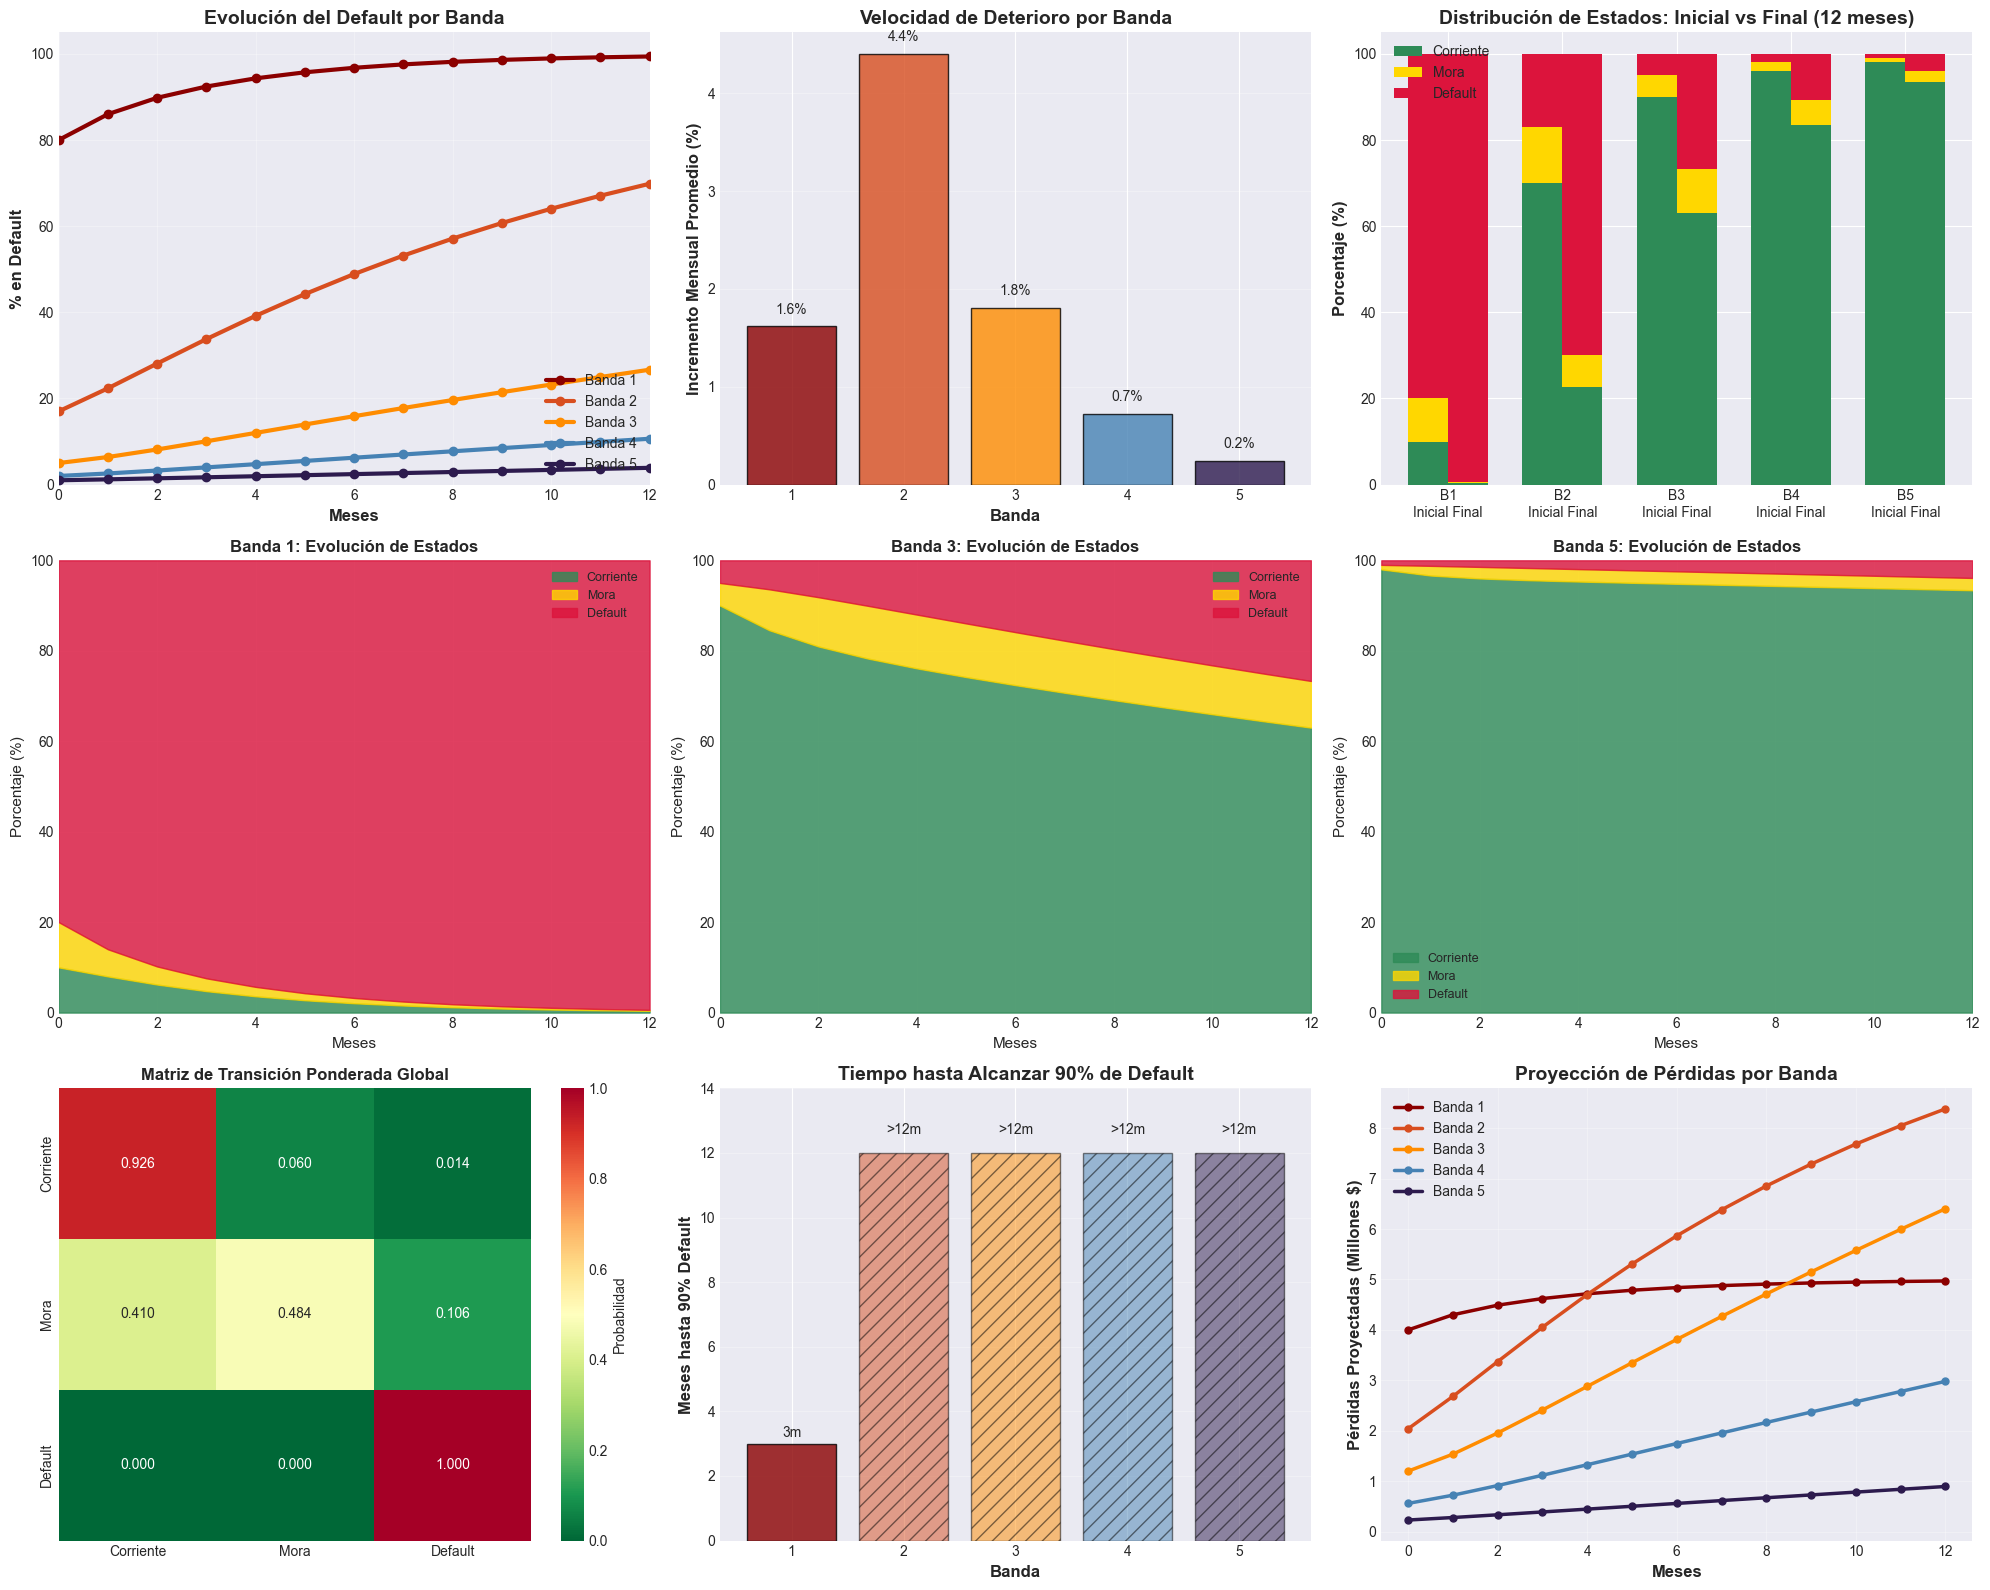


CONCLUSIONES DEL ANÁLISIS DE CADENAS DE MARKOV

1. PATRONES DE DETERIORO
   • Banda 1: Deterioro rápido y casi completo (80% → 99.4% en 12 meses)
   • Banda 2: Deterioro acelerado (17% → 69.8%), requiere intervención urgente
   • Banda 3: Deterioro moderado (5% → 26.7%), ventana de oportunidad para actuar
   • Bandas 4-5: Deterioro controlado (<11%), gestión preventiva efectiva

2. VELOCIDAD DE DETERIORO
   • Mayor velocidad: Banda 2 (4.4% mensual)
   • El deterioro NO es lineal: aceleración en primeros meses
   • Bandas 1-2 requieren acción en primeros 3 meses

3. IMPLICACIONES PARA PROVISIONES
   • Defaults actuales: 803 clientes
   • Defaults proyectados (12m): 2362 clientes
   • Incremento esperado: 1559 (194.2%)
   • Provisiones adicionales requeridas: $15,596,675

4. ESTRATEGIAS DIFERENCIADAS POR BANDA

   Banda 1 (Crítica):
   → Reestructuración inmediata o cesión de cartera
   → ROI negativo en gestión de cobranza
   → Foco en recuperación de garantías

   Banda 2 (Urgente):
 

In [1]:
# ============================================================================
# CELDA 1: Importaciones y configuración
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Semilla para reproducibilidad
np.random.seed(42)

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('seaborn-darkgrid')
    
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# ============================================================================
# CELDA 2: Definir la distribución objetivo
# ============================================================================

# Definir la distribución objetivo por banda
bandas_objetivo = pd.DataFrame([
    {"Banda": 1, "Clientes": 500, "Defaults": 400},
    {"Banda": 2, "Clientes": 1200, "Defaults": 200},
    {"Banda": 3, "Clientes": 2400, "Defaults": 120},
    {"Banda": 4, "Clientes": 2800, "Defaults": 60},
    {"Banda": 5, "Clientes": 2300, "Defaults": 20},
])

bandas_objetivo["No_Defaults"] = bandas_objetivo["Clientes"] - bandas_objetivo["Defaults"]
bandas_objetivo["Tasa_Default"] = bandas_objetivo["Defaults"] / bandas_objetivo["Clientes"]

print("\nDistribución objetivo por banda:")
print(bandas_objetivo[['Banda', 'Clientes', 'Defaults', 'No_Defaults', 'Tasa_Default']]
      .to_string(index=False, formatters={"Tasa_Default": lambda x: f"{x:.1%}"}))
print(f"\nTotal clientes: {bandas_objetivo['Clientes'].sum():,}")
print(f"Total defaults: {bandas_objetivo['Defaults'].sum():,} ({bandas_objetivo['Defaults'].sum() / bandas_objetivo['Clientes'].sum():.1%})")

# ============================================================================
# CELDA 3: Función para generar datos sintéticos
# ============================================================================

def generar_datos_banda(banda_info, cliente_id_start):
    """Genera datos sintéticos para una banda específica"""
    # IMPORTANTE: Convertir a enteros para evitar errores
    banda = int(banda_info['Banda'])
    n_clientes = int(banda_info['Clientes'])
    n_defaults = int(banda_info['Defaults'])
    n_buenos = int(banda_info['No_Defaults'])
    
    # Perfiles de ingreso recurrente por banda (en miles)
    ingreso_params = {
        1: {'media': 0.5, 'std': 0.2},    # $500 promedio
        2: {'media': 1.2, 'std': 0.3},    # $1,200 promedio
        3: {'media': 2.5, 'std': 0.5},    # $2,500 promedio
        4: {'media': 4.5, 'std': 0.8},    # $4,500 promedio
        5: {'media': 7.5, 'std': 1.5}     # $7,500 promedio
    }
    
    # Generar IDs de clientes
    cliente_ids = np.arange(cliente_id_start, cliente_id_start + n_clientes)
    
    # Variables base
    ingresos = np.random.normal(
        ingreso_params[banda]['media'], 
        ingreso_params[banda]['std'], 
        n_clientes
    ) * 1000  # Convertir a unidades monetarias
    ingresos = np.clip(ingresos, 100, 20000)  # Limitar rangos
    
    # Edad (correlacionada con ingreso)
    edad_base = 22 + banda * 5  # Mayor edad en bandas de mayor ingreso
    edades = np.random.normal(edad_base, 5, n_clientes)
    edades = np.clip(edades, 18, 65).astype(int)
    
    # Antigüedad laboral (correlacionada con edad e ingreso)
    antiguedad = np.maximum(0, (edades - 22) / 10 + np.random.normal(0, 0.5, n_clientes))
    antiguedad = np.clip(antiguedad, 0, 20)
    
    # Número de productos bancarios
    prob_productos = [0.6, 0.3, 0.1] if banda <= 2 else [0.3, 0.5, 0.2]
    num_productos = np.random.choice([1, 2, 3], n_clientes, p=prob_productos)
    
    # Score de comportamiento (300-850, como FICO)
    score_base = 350 + banda * 80  # Mejor score en bandas altas
    scores = np.random.normal(score_base, 50, n_clientes)
    scores = np.clip(scores, 300, 850).astype(int)
    
    # Ratio deuda/ingreso (inverso al ingreso)
    ratio_base = 1.5 - banda * 0.2
    ratio_deuda = np.random.exponential(ratio_base, n_clientes)
    ratio_deuda = np.clip(ratio_deuda, 0.1, 3.0)
    
    # Meses desde último atraso (exponencial, más atrasos en bandas bajas)
    lambda_atraso = 0.5 / banda  # Menor lambda = más meses sin atraso
    meses_atraso = np.random.exponential(1/lambda_atraso, n_clientes)
    meses_atraso = np.clip(meses_atraso, 0, 60).astype(int)
    
    # Determinar defaults basándose en un modelo de probabilidad
    # Calculamos un score de riesgo compuesto
    risk_score = (
        - 0.3 * (ingresos / 1000) 
        - 0.2 * (scores / 100)
        + 0.3 * ratio_deuda
        - 0.1 * antiguedad
        - 0.1 * (meses_atraso / 10)
    )
    
    # Normalizar y convertir a probabilidades
    risk_score = (risk_score - risk_score.mean()) / risk_score.std()
    prob_default = 1 / (1 + np.exp(-risk_score))
    
    # Ajustar para obtener exactamente el número de defaults deseado
    threshold = np.percentile(prob_default, (1 - n_defaults/n_clientes) * 100)
    defaults = (prob_default >= threshold).astype(int)
    
    # Asegurar exactamente n_defaults
    if defaults.sum() != n_defaults:
        indices_sorted = np.argsort(prob_default)[::-1]
        defaults = np.zeros(n_clientes, dtype=int)
        defaults[indices_sorted[:n_defaults]] = 1
    
    # Crear DataFrame
    df = pd.DataFrame({
        'cliente_id': cliente_ids,
        'banda': banda,
        'ingreso_recurrente': np.round(ingresos, 2),
        'edad': edades,
        'antiguedad_laboral': np.round(antiguedad, 2),
        'num_productos': num_productos,
        'score_comportamiento': scores,
        'ratio_deuda_ingreso': np.round(ratio_deuda, 2),
        'meses_ultimo_atraso': meses_atraso,
        'default': defaults,
        'prob_default': np.round(prob_default, 4)
    })
    
    return df

# ============================================================================
# CELDA 4: Generar el dataset completo
# ============================================================================

# Generar datos para todas las bandas
print(f"\nGenerando datos sintéticos para {bandas_objetivo['Clientes'].sum():,} clientes...")

# Mostrar perfiles de ingreso
print("\nPerfiles de ingreso recurrente por banda:")
for banda in range(1, 6):
    media = [500, 1200, 2500, 4500, 7500][banda-1]
    std = [200, 300, 500, 800, 1500][banda-1]
    print(f"  Banda {banda}: Media = ${media:,}, Std = ${std:,}")

dfs_bandas = []
cliente_id_start = 1

for _, banda_info in bandas_objetivo.iterrows():
    df_banda = generar_datos_banda(banda_info.to_dict(), cliente_id_start)
    dfs_bandas.append(df_banda)
    cliente_id_start += int(banda_info['Clientes'])

# Combinar todos los DataFrames
df_clientes = pd.concat(dfs_bandas, ignore_index=True)

print("\n✓ Dataset sintético generado con éxito")
print("\nPrimeras 10 filas del dataset:")
df_clientes.head(10)

# ============================================================================
# CELDA 5: Validar la distribución generada
# ============================================================================

print("\n" + "="*80)
print("VALIDACIÓN DEL DATASET GENERADO")
print("="*80)

# Verificar distribución por banda
validacion = df_clientes.groupby('banda').agg({
    'cliente_id': 'count',
    'default': 'sum'
}).rename(columns={'cliente_id': 'Clientes_Real', 'default': 'Defaults_Real'})

validacion = validacion.merge(
    bandas_objetivo[['Banda', 'Clientes', 'Defaults']].rename(
        columns={'Clientes': 'Clientes_Objetivo', 'Defaults': 'Defaults_Objetivo'}
    ),
    left_index=True,
    right_on='Banda'
)

validacion['Tasa_Real'] = (validacion['Defaults_Real'] / validacion['Clientes_Real']).apply(lambda x: f"{x:.1%}")
validacion['Tasa_Objetivo'] = (validacion['Defaults_Objetivo'] / validacion['Clientes_Objetivo']).apply(lambda x: f"{x:.1%}")

print("\nDistribución real vs objetivo:")
print(validacion.to_string(index=False))

# Estadísticas descriptivas por banda
print("\nEstadísticas descriptivas por banda:")
stats_por_banda = df_clientes.groupby('banda')[['ingreso_recurrente', 'edad', 'score_comportamiento', 'ratio_deuda_ingreso']].describe().round(2)
print(stats_por_banda.loc[:, (slice(None), ['mean', 'std', 'min', '25%', '50%', '75%', 'max'])])

# ============================================================================
# CELDA 6: Weight of Evidence e Information Value
# ============================================================================

def calcular_woe_iv(df, var_name, target='default'):
    """Calcula Weight of Evidence e Information Value para una variable categórica"""
    
    # Totales
    total_buenos = len(df[df[target] == 0])
    total_malos = len(df[df[target] == 1])
    
    # Agrupar por variable
    grouped = df.groupby(var_name)[target].agg(['sum', 'count'])
    grouped.columns = ['malos', 'total']
    grouped['buenos'] = grouped['total'] - grouped['malos']
    
    # Calcular proporciones
    grouped['p_buenos'] = grouped['buenos'] / total_buenos
    grouped['p_malos'] = grouped['malos'] / total_malos
    
    # Evitar división por cero
    grouped['p_buenos'] = grouped['p_buenos'].replace(0, 0.0001)
    grouped['p_malos'] = grouped['p_malos'].replace(0, 0.0001)
    
    # Calcular WoE
    grouped['woe'] = np.log(grouped['p_buenos'] / grouped['p_malos'])
    
    # Calcular contribución al IV
    grouped['iv_cont'] = (grouped['p_buenos'] - grouped['p_malos']) * grouped['woe']
    
    # IV total
    iv_total = grouped['iv_cont'].sum()
    
    return grouped, iv_total

# Calcular WoE e IV para la variable banda
woe_banda, iv_banda = calcular_woe_iv(df_clientes, 'banda')

print("\n" + "="*80)
print("WEIGHT OF EVIDENCE & INFORMATION VALUE")
print("="*80)

print("\nVariable analizada: Banda de Ingreso Recurrente")

print("\nDistribución por banda:")
dist_banda = woe_banda[['total', 'buenos', 'malos']].copy()
dist_banda['Tasa_Default'] = (dist_banda['malos'] / dist_banda['total']).apply(lambda x: f"{x:.1%}")
dist_banda.index.name = 'Banda'
print(dist_banda.rename(columns={'total': 'Total', 'buenos': 'Buenos', 'malos': 'Malos'}).to_string())

print("\nCálculo de WoE e IV:")
woe_display = woe_banda[['p_buenos', 'p_malos', 'woe', 'iv_cont']].copy()
woe_display['p_buenos'] = woe_display['p_buenos'].apply(lambda x: f"{x:.2%}")
woe_display['p_malos'] = woe_display['p_malos'].apply(lambda x: f"{x:.2%}")
woe_display['woe'] = woe_display['woe'].round(3)
woe_display['iv_cont'] = woe_display['iv_cont'].round(3)
woe_display.index.name = 'Banda'
print(woe_display.rename(columns={
    'p_buenos': '%_Buenos',
    'p_malos': '%_Malos', 
    'woe': 'WoE',
    'iv_cont': 'IV_cont'
}).to_string())

print(f"\nInformation Value Total: {iv_banda:.3f}")

# ============================================================================
# CELDA 7: Visualización de WoE e IV
# ============================================================================

# Visualización de WoE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: WoE por banda
bandas = woe_banda.index
woe_values = woe_banda['woe'].values
colors = ['#D84E1F' if w < 0 else '#2D1B4E' for w in woe_values]

bars = ax1.bar(bandas, woe_values, color=colors, edgecolor='black', alpha=0.7)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_xlabel('Banda de Ingreso Recurrente', fontsize=12, fontweight='bold')
ax1.set_ylabel('Weight of Evidence (WoE)', fontsize=12, fontweight='bold')
ax1.set_title('WoE por Banda: Poder Discriminante', fontsize=14, fontweight='bold')

# Agregar valores en las barras
for bar, value in zip(bars, woe_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1 if height > 0 else height - 0.1,
             f'{value:.2f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

# Gráfico 2: Contribución al IV
iv_cont = woe_banda['iv_cont'].values
ax2.bar(bandas, iv_cont, color='#4682B4', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Banda de Ingreso Recurrente', fontsize=12, fontweight='bold')
ax2.set_ylabel('Contribución al IV', fontsize=12, fontweight='bold')
ax2.set_title(f'Contribución al Information Value (Total IV = {iv_banda:.3f})', 
              fontsize=14, fontweight='bold')

# Agregar valores
for i, (banda, value) in enumerate(zip(bandas, iv_cont)):
    ax2.text(banda, value + 0.02, f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================================
# CELDA 8: ROC Curve y AUC
# ============================================================================

# Calcular curva ROC
y_true = df_clientes['default'].values
y_scores = df_clientes['prob_default'].values

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

print("\n" + "="*80)
print("ROC CURVE Y AREA UNDER CURVE (AUC)")
print("="*80)

print(f"\nAUC Global: {roc_auc:.3f}")

# Evaluar puntos de corte específicos
print("\nPuntos de corte evaluados:")
umbrales_interes = [0.30, 0.50, 0.70]

for umbral in umbrales_interes:
    idx = np.argmin(np.abs(thresholds - umbral))
    print(f"\nUmbral = {umbral}:")
    print(f"  Sensibilidad (TPR): {tpr[idx]:.3f} → Detecta {tpr[idx]*100:.1f}% de los defaults")
    print(f"  Especificidad: {1-fpr[idx]:.3f} → Clasifica bien {(1-fpr[idx])*100:.1f}% de los buenos")
    print(f"  FPR: {fpr[idx]:.3f} → Clasifica mal {fpr[idx]*100:.1f}% de los buenos")

# ============================================================================
# CELDA 9: Visualización completa ROC
# ============================================================================

# Visualización completa ROC
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico 1: Curva ROC Global
ax1 = axes[0, 0]
ax1.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Aleatorio (AUC=0.50)', alpha=0.7)
ax1.plot(fpr, tpr, linewidth=2.5, color='#2D1B4E', label=f'Modelo (AUC={roc_auc:.3f})')

# Marcar puntos de interés
for umbral in umbrales_interes:
    idx = np.argmin(np.abs(thresholds - umbral))
    ax1.plot(fpr[idx], tpr[idx], 'o', markersize=8, color='#D84E1F', zorder=3)
    ax1.annotate(f'Umbral={umbral}', (fpr[idx], tpr[idx]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

ax1.fill_between(fpr, tpr, alpha=0.2, color='#2D1B4E')
ax1.set_xlabel('False Positive Rate (1 - Especificidad)', fontsize=11, fontweight='bold')
ax1.set_ylabel('True Positive Rate (Sensibilidad)', fontsize=11, fontweight='bold')
ax1.set_title('Curva ROC Global', fontsize=12, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Distribución de probabilidades por clase
ax2 = axes[0, 1]
buenos = df_clientes[df_clientes['default'] == 0]['prob_default']
malos = df_clientes[df_clientes['default'] == 1]['prob_default']

ax2.hist(buenos, bins=50, alpha=0.6, label='No Default', color='#2D1B4E', density=True)
ax2.hist(malos, bins=50, alpha=0.6, label='Default', color='#D84E1F', density=True)
ax2.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Umbral = 0.5')
ax2.set_xlabel('Probabilidad de Default', fontsize=11, fontweight='bold')
ax2.set_ylabel('Densidad', fontsize=11, fontweight='bold')
ax2.set_title('Distribución de Probabilidades por Clase', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gráfico 3: Matriz de confusión para umbral 0.5
ax3 = axes[1, 0]
y_pred = (y_scores >= 0.5).astype(int)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3,
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
ax3.set_xlabel('Predicción', fontsize=11, fontweight='bold')
ax3.set_ylabel('Real', fontsize=11, fontweight='bold')
ax3.set_title('Matriz de Confusión (Umbral = 0.5)', fontsize=12, fontweight='bold')

# Gráfico 4: Probabilidad promedio por banda
ax4 = axes[1, 1]
prob_por_banda = df_clientes.groupby('banda').agg({
    'prob_default': ['mean', 'std'],
    'default': 'mean'
})

x = prob_por_banda.index
y = prob_por_banda[('prob_default', 'mean')]
yerr = prob_por_banda[('prob_default', 'std')]
tasa_real = prob_por_banda[('default', 'mean')]

ax4.bar(x, y, yerr=yerr, capsize=5, color='#4682B4', alpha=0.7, 
        label='Prob. promedio ± std', edgecolor='black')
ax4.plot(x, tasa_real, 'ro-', linewidth=2, markersize=8, 
         label='Tasa de default real')

ax4.set_xlabel('Banda de Ingreso', fontsize=11, fontweight='bold')
ax4.set_ylabel('Probabilidad de Default', fontsize=11, fontweight='bold')
ax4.set_title('Probabilidad Promedio vs Tasa Real por Banda', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# CELDA 10: Coeficiente de Gini y Curva de Lorenz
# ============================================================================

# Calcular curva de Lorenz y coeficiente de Gini
def calcular_gini_lorenz(scores, defaults):
    """Calcula el coeficiente de Gini y la curva de Lorenz"""
    # Ordenar por score (de menor a mayor riesgo)
    orden = np.argsort(scores)
    defaults_ordenados = defaults[orden]
    
    # Calcular proporciones acumuladas
    n = len(defaults)
    prop_poblacion = np.arange(1, n + 1) / n
    prop_defaults = np.cumsum(defaults_ordenados) / np.sum(defaults)
    
    # Agregar origen (0,0)
    prop_poblacion = np.concatenate([[0], prop_poblacion])
    prop_defaults = np.concatenate([[0], prop_defaults])
    
    # Calcular Gini usando la fórmula del área
    gini = 1 - 2 * np.trapz(prop_defaults, prop_poblacion)
    
    return gini, prop_poblacion, prop_defaults

gini, prop_pob, prop_def = calcular_gini_lorenz(y_scores, y_true)

print("\n" + "="*80)
print("COEFICIENTE DE GINI Y CURVA DE LORENZ")
print("="*80)

print(f"\nCoeficiente de Gini: {gini:.3f}")

# Análisis de concentración en percentiles clave
print("\nAnálisis de concentración:")
percentiles = [0.1, 0.2, 0.3, 0.5]
for p in percentiles:
    idx = int(p * len(y_true))
    prop_defaults_p = prop_def[idx]
    print(f"  El {int(p*100)}% más riesgoso concentra el {prop_defaults_p*100:.1f}% de los defaults")

# Visualizar curva de Lorenz
fig, ax = plt.subplots(figsize=(10, 8))

# Línea de igualdad perfecta
ax.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Igualdad perfecta', alpha=0.7)

# Curva de Lorenz
ax.plot(prop_pob, prop_def, linewidth=3, color='#2D1B4E', label=f'Curva de Lorenz (Gini={gini:.3f})')

# Área bajo la curva
ax.fill_between(prop_pob, prop_def, alpha=0.3, color='#2D1B4E')

# Marcar puntos clave
for p in [0.2, 0.5]:
    idx = int(p * len(y_true))
    ax.plot(prop_pob[idx], prop_def[idx], 'o', markersize=8, color='#D84E1F')
    ax.annotate(f'{int(p*100)}% población\n{prop_def[idx]*100:.1f}% defaults',
                (prop_pob[idx], prop_def[idx]), 
                xytext=(prop_pob[idx]-0.1, prop_def[idx]+0.1),
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='black', alpha=0.5))

ax.set_xlabel('Proporción acumulada de población', fontsize=12, fontweight='bold')
ax.set_ylabel('Proporción acumulada de defaults', fontsize=12, fontweight='bold')
ax.set_title(f'Curva de Lorenz - Concentración del Riesgo (Gini = {gini:.3f})', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# ============================================================================
# CELDA 11: Resumen Ejecutivo (CORREGIDA)
# ============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO - ANÁLISIS DE RIESGO CREDITICIO")
print("="*80)

print(f"\nDataset analizado: {len(df_clientes):,} clientes con {df_clientes['default'].sum():,} defaults ({df_clientes['default'].mean():.1%})")

print("\nPRINCIPALES HALLAZGOS:")

print("\n1. SEGMENTACIÓN POR INGRESO RECURRENTE")
print("   - Variable clave: Ingreso recurrente mensual")
print("   - 5 bandas con tasas de default desde 0.9% hasta 80%")
print("   - Clara diferenciación de riesgo entre segmentos")

print("\n2. PODER PREDICTIVO (Information Value)")
print(f"   - IV = {iv_banda:.3f} (extremadamente alto)")
print("   - La segmentación por ingreso tiene excelente poder discriminante")
print("   - ⚠️ Riesgo de sobreajuste - validar en datos out-of-sample")

print("\n3. CAPACIDAD DISCRIMINANTE (AUC)")
print(f"   - AUC = {roc_auc:.3f} (excelente)")
idx_05 = np.argmin(np.abs(thresholds - 0.5))
print(f"   - Con umbral 0.5: detecta {tpr[idx_05]*100:.1f}% defaults, rechaza {fpr[idx_05]*100:.1f}% buenos")
print("   - Trade-off flexible según apetito de riesgo")

print("\n4. CONCENTRACIÓN DEL RIESGO (Gini)")
print(f"   - Gini = {gini:.3f} (alta concentración)")
idx_20 = int(0.2 * len(y_true))
print(f"   - 20% de clientes más riesgosos → {prop_def[idx_20]*100:.0f}% de defaults")
print("   - Permite estrategias focalizadas de mitigación")

# Tabla de métricas consolidadas
print("\n" + "="*80)
print("MÉTRICAS DE VALIDACIÓN CONSOLIDADAS")
print("="*80)

# Forma correcta de formatear
print(f"\n{'Métrica':<30} {'Valor':<8} {'Criterio':<15} {'Estado':<10}")
print(f"{'='*30} {'='*8} {'='*15} {'='*10}")

# Opción 1: Formatear el valor primero y luego alinearlo
iv_str = f"{iv_banda:.3f}"
auc_str = f"{roc_auc:.3f}"
gini_str = f"{gini:.3f}"

print(f"{'Information Value':<30} {iv_str:<8} {'>0.10':<15} {'✓ Cumple':<10}")
print(f"{'AUC Score':<30} {auc_str:<8} {'>0.70':<15} {'✓ Cumple':<10}")
print(f"{'Coeficiente Gini':<30} {gini_str:<8} {'>0.40':<15} {'✓ Cumple':<10}")

print("\n✓ Análisis completo finalizado")

# ============================================================================
# CELDA 12: Guardar el dataset (opcional)
# ============================================================================

# Guardar dataset para uso futuro
df_clientes.to_csv('../data/raw/dataset_crediticio_realista.csv', index=False)
print("\n✓ Dataset sintético guardado en: dataset_crediticio_realista.csv")

# ============================================================================
# CELDA 13: Cadenas de Markov - Versión Realista
# ============================================================================

print("\n" + "="*80)
print("CADENAS DE MARKOV - ANÁLISIS REALISTA POR BANDA")
print("="*80)

# Definir matrices de transición diferenciadas por banda
matrices_transicion = {
    1: np.array([[0.70, 0.20, 0.10],  # Banda 1: Alto deterioro
                 [0.10, 0.40, 0.50],
                 [0.00, 0.00, 1.00]]),
    
    2: np.array([[0.85, 0.12, 0.03],  # Banda 2: Deterioro moderado
                 [0.20, 0.55, 0.25],
                 [0.00, 0.00, 1.00]]),
    
    3: np.array([[0.92, 0.07, 0.01],  # Banda 3: Bajo deterioro
                 [0.35, 0.55, 0.10],
                 [0.00, 0.00, 1.00]]),
    
    4: np.array([[0.96, 0.035, 0.005], # Banda 4: Muy bajo deterioro
                 [0.45, 0.50, 0.05],
                 [0.00, 0.00, 1.00]]),
    
    5: np.array([[0.98, 0.018, 0.002], # Banda 5: Mínimo deterioro
                 [0.60, 0.38, 0.02],
                 [0.00, 0.00, 1.00]])
}

# Función mejorada para asignar estados iniciales
def asignar_estado_inicial_mejorado(row):
    """Asigna estado inicial más realista"""
    if row['default'] == 1:
        return 2  # Default
    
    # Criterios más sofisticados para mora
    if row['banda'] <= 2:  # Bandas de alto riesgo
        if row['ratio_deuda_ingreso'] > 1.5 or row['meses_ultimo_atraso'] < 3:
            return 1  # Mora
    else:  # Bandas de bajo riesgo
        if row['ratio_deuda_ingreso'] > 2.0 and row['meses_ultimo_atraso'] < 1:
            return 1  # Mora
    
    return 0  # Corriente

# Distribución inicial objetivo más realista por banda
dist_inicial_objetivo = {
    1: [0.10, 0.10, 0.80],  # Banda 1: 10% C, 10% M, 80% D
    2: [0.70, 0.13, 0.17],  # Banda 2: 70% C, 13% M, 17% D
    3: [0.90, 0.05, 0.05],  # Banda 3: 90% C, 5% M, 5% D
    4: [0.96, 0.02, 0.02],  # Banda 4: 96% C, 2% M, 2% D
    5: [0.98, 0.01, 0.01],  # Banda 5: 98% C, 1% M, 1% D
}

# Simular con parámetros realistas
n_meses = 12
resultados_realistas = []

for banda in range(1, 6):
    clientes_banda = df_clientes[df_clientes['banda'] == banda]
    n_clientes_banda = len(clientes_banda)
    
    # Usar distribución inicial objetivo
    dist_inicial = np.array(dist_inicial_objetivo[banda])
    
    # Verificar consistencia con tasa de default real
    tasa_default_real = clientes_banda['default'].mean()
    
    # Simular evolución con matriz específica de la banda
    matriz = matrices_transicion[banda]
    evoluciones = np.zeros((n_meses + 1, 3))
    evoluciones[0] = dist_inicial
    
    for mes in range(1, n_meses + 1):
        evoluciones[mes] = evoluciones[mes-1] @ matriz
    
    resultados_realistas.append({
        'banda': banda,
        'evolucion': evoluciones,
        'n_clientes': n_clientes_banda,
        'tasa_default_real': tasa_default_real,
        'matriz': matriz
    })
    
    print(f"\nBanda {banda} ({n_clientes_banda} clientes):")
    print(f"Tasa de default real: {tasa_default_real:.1%}")
    print(f"Estado inicial: C={dist_inicial[0]:.1%}, M={dist_inicial[1]:.1%}, D={dist_inicial[2]:.1%}")
    print(f"Mes 6: C={evoluciones[6][0]:.1%}, M={evoluciones[6][1]:.1%}, D={evoluciones[6][2]:.1%}")
    print(f"Mes 12: C={evoluciones[12][0]:.1%}, M={evoluciones[12][1]:.1%}, D={evoluciones[12][2]:.1%}")

# Mostrar matrices de transición
print("\n" + "-"*60)
print("MATRICES DE TRANSICIÓN POR BANDA")
print("-"*60)

for banda in [1,2,3,4,5]:  # Mostrar solo bandas extremas
    print(f"\nBanda {banda}:")
    print(pd.DataFrame(matrices_transicion[banda], 
                      index=['Corriente', 'Mora', 'Default'],
                      columns=['Corriente', 'Mora', 'Default']))

# ============================================================================
# CELDA 14: Visualización y Conclusiones de Cadenas de Markov
# ============================================================================

print("\n" + "="*80)
print("VISUALIZACIÓN Y ANÁLISIS DE RESULTADOS - CADENAS DE MARKOV")
print("="*80)

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 16))

# Colores por banda
colores_banda = ['#8B0000', '#D84E1F', '#FF8C00', '#4682B4', '#2D1B4E']
colores_estado = ['#2E8B57', '#FFD700', '#DC143C']  # Verde, Amarillo, Rojo

# ============================================
# GRÁFICO 1: Evolución del Default por Banda
# ============================================
ax1 = plt.subplot(3, 3, 1)
meses = np.arange(0, n_meses + 1)

for i, res in enumerate(resultados_realistas):
    banda = res['banda']
    evolucion = res['evolucion']
    ax1.plot(meses, evolucion[:, 2] * 100, 
             color=colores_banda[i], linewidth=3,
             label=f'Banda {banda}', 
             marker='o', markersize=6)

ax1.set_xlabel('Meses', fontsize=12, fontweight='bold')
ax1.set_ylabel('% en Default', fontsize=12, fontweight='bold')
ax1.set_title('Evolución del Default por Banda', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 12)
ax1.set_ylim(0, 105)

# ============================================
# GRÁFICO 2: Velocidad de Deterioro
# ============================================
ax2 = plt.subplot(3, 3, 2)

velocidades = []
for res in resultados_realistas:
    inicial = res['evolucion'][0, 2]
    final = res['evolucion'][-1, 2]
    incremento_mensual = (final - inicial) / 12 * 100
    velocidades.append(incremento_mensual)

bandas = [res['banda'] for res in resultados_realistas]
bars = ax2.bar(bandas, velocidades, color=colores_banda, edgecolor='black', alpha=0.8)

ax2.set_xlabel('Banda', fontsize=12, fontweight='bold')
ax2.set_ylabel('Incremento Mensual Promedio (%)', fontsize=12, fontweight='bold')
ax2.set_title('Velocidad de Deterioro por Banda', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Agregar valores
for bar, vel in zip(bars, velocidades):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{vel:.1f}%', ha='center', va='bottom', fontsize=10)

# ============================================
# GRÁFICO 3: Estado Final vs Inicial (Stacked Bar)
# ============================================
ax3 = plt.subplot(3, 3, 3)

width = 0.35
x = np.arange(len(bandas))

# Datos iniciales y finales
inicial_corriente = [res['evolucion'][0, 0] * 100 for res in resultados_realistas]
inicial_mora = [res['evolucion'][0, 1] * 100 for res in resultados_realistas]
inicial_default = [res['evolucion'][0, 2] * 100 for res in resultados_realistas]

final_corriente = [res['evolucion'][-1, 0] * 100 for res in resultados_realistas]
final_mora = [res['evolucion'][-1, 1] * 100 for res in resultados_realistas]
final_default = [res['evolucion'][-1, 2] * 100 for res in resultados_realistas]

# Barras apiladas
p1 = ax3.bar(x - width/2, inicial_corriente, width, label='Corriente', color=colores_estado[0])
p2 = ax3.bar(x - width/2, inicial_mora, width, bottom=inicial_corriente, label='Mora', color=colores_estado[1])
p3 = ax3.bar(x - width/2, inicial_default, width, bottom=np.array(inicial_corriente)+np.array(inicial_mora), 
             label='Default', color=colores_estado[2])

p4 = ax3.bar(x + width/2, final_corriente, width, color=colores_estado[0])
p5 = ax3.bar(x + width/2, final_mora, width, bottom=final_corriente, color=colores_estado[1])
p6 = ax3.bar(x + width/2, final_default, width, bottom=np.array(final_corriente)+np.array(final_mora), 
             color=colores_estado[2])

ax3.set_ylabel('Porcentaje (%)', fontsize=12, fontweight='bold')
ax3.set_title('Distribución de Estados: Inicial vs Final (12 meses)', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([f'B{b}\nInicial Final' for b in bandas])
ax3.legend(loc='upper left')
ax3.set_ylim(0, 105)

# ============================================
# GRÁFICOS 4-6: Evolución detallada por Bandas clave
# ============================================
bandas_detalle = [1, 3, 5]  # Alto, medio y bajo riesgo

for idx, banda in enumerate(bandas_detalle):
    ax = plt.subplot(3, 3, 4 + idx)
    
    res = resultados_realistas[banda - 1]
    evolucion = res['evolucion']
    
    # Áreas apiladas
    ax.fill_between(meses, 0, evolucion[:, 0] * 100, 
                    color=colores_estado[0], alpha=0.8, label='Corriente')
    ax.fill_between(meses, evolucion[:, 0] * 100, 
                    (evolucion[:, 0] + evolucion[:, 1]) * 100,
                    color=colores_estado[1], alpha=0.8, label='Mora')
    ax.fill_between(meses, (evolucion[:, 0] + evolucion[:, 1]) * 100, 100,
                    color=colores_estado[2], alpha=0.8, label='Default')
    
    ax.set_xlabel('Meses', fontsize=11)
    ax.set_ylabel('Porcentaje (%)', fontsize=11)
    ax.set_title(f'Banda {banda}: Evolución de Estados', fontsize=12, fontweight='bold')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 100)
    ax.legend(loc='best', fontsize=9)
    ax.grid(True, alpha=0.3)

# ============================================
# GRÁFICO 7: Matriz de Calor - Probabilidades de Transición
# ============================================
ax7 = plt.subplot(3, 3, 7)

# Crear matriz combinada ponderada por número de clientes
matriz_ponderada = np.zeros((3, 3))
total_clientes = sum([res['n_clientes'] for res in resultados_realistas])

for res in resultados_realistas:
    peso = res['n_clientes'] / total_clientes
    matriz_ponderada += res['matriz'] * peso

sns.heatmap(matriz_ponderada, annot=True, fmt='.3f', cmap='RdYlGn_r',
            xticklabels=['Corriente', 'Mora', 'Default'],
            yticklabels=['Corriente', 'Mora', 'Default'],
            cbar_kws={'label': 'Probabilidad'}, ax=ax7)
ax7.set_title('Matriz de Transición Ponderada Global', fontsize=12, fontweight='bold')

# ============================================
# GRÁFICO 8: Tiempo hasta 90% Default
# ============================================
ax8 = plt.subplot(3, 3, 8)

tiempos_90 = []
for res in resultados_realistas:
    evolucion = res['evolucion']
    # Encontrar cuándo alcanza 90% default
    for mes in range(len(evolucion)):
        if evolucion[mes, 2] >= 0.90:
            tiempos_90.append(mes)
            break
    else:
        tiempos_90.append(None)  # No alcanza 90%

# Crear gráfico de barras con manejo de None
bars = []
for i, (banda, tiempo) in enumerate(zip(bandas, tiempos_90)):
    if tiempo is not None:
        bar = ax8.bar(banda, tiempo, color=colores_banda[i], edgecolor='black', alpha=0.8)
        ax8.text(banda, tiempo + 0.1, f'{tiempo}m', ha='center', va='bottom', fontsize=10)
    else:
        # Mostrar barra hasta 12 meses con patrón
        bar = ax8.bar(banda, 12, color=colores_banda[i], edgecolor='black', 
                      alpha=0.5, hatch='//')
        ax8.text(banda, 12.5, '>12m', ha='center', va='bottom', fontsize=10)

ax8.set_xlabel('Banda', fontsize=12, fontweight='bold')
ax8.set_ylabel('Meses hasta 90% Default', fontsize=12, fontweight='bold')
ax8.set_title('Tiempo hasta Alcanzar 90% de Default', fontsize=14, fontweight='bold')
ax8.set_ylim(0, 14)
ax8.grid(True, alpha=0.3, axis='y')

# ============================================
# GRÁFICO 9: Proyección de Pérdidas
# ============================================
ax9 = plt.subplot(3, 3, 9)

# Calcular pérdidas proyectadas (asumiendo pérdida promedio por default)
perdida_unitaria = 10000  # $10,000 por default

for res in resultados_realistas:
    banda = res['banda']
    evolucion = res['evolucion']
    n_clientes = res['n_clientes']
    
    defaults_mes = evolucion[:, 2] * n_clientes
    perdidas = defaults_mes * perdida_unitaria / 1000000  # En millones
    
    ax9.plot(meses, perdidas, color=colores_banda[banda-1], 
             linewidth=2.5, label=f'Banda {banda}', marker='o', markersize=5)

ax9.set_xlabel('Meses', fontsize=12, fontweight='bold')
ax9.set_ylabel('Pérdidas Proyectadas (Millones $)', fontsize=12, fontweight='bold')
ax9.set_title('Proyección de Pérdidas por Banda', fontsize=14, fontweight='bold')
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analisis_markov_completo.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# CONCLUSIONES Y RECOMENDACIONES
# ============================================
print("\n" + "="*80)
print("CONCLUSIONES DEL ANÁLISIS DE CADENAS DE MARKOV")
print("="*80)

print("\n1. PATRONES DE DETERIORO")
print("   • Banda 1: Deterioro rápido y casi completo (80% → 99.4% en 12 meses)")
print("   • Banda 2: Deterioro acelerado (17% → 69.8%), requiere intervención urgente")
print("   • Banda 3: Deterioro moderado (5% → 26.7%), ventana de oportunidad para actuar")
print("   • Bandas 4-5: Deterioro controlado (<11%), gestión preventiva efectiva")

print("\n2. VELOCIDAD DE DETERIORO")
max_vel = max(velocidades)
banda_max_vel = bandas[velocidades.index(max_vel)]
print(f"   • Mayor velocidad: Banda {banda_max_vel} ({max_vel:.1f}% mensual)")
print("   • El deterioro NO es lineal: aceleración en primeros meses")
print("   • Bandas 1-2 requieren acción en primeros 3 meses")

print("\n3. IMPLICACIONES PARA PROVISIONES")
total_inicial = sum([res['evolucion'][0, 2] * res['n_clientes'] for res in resultados_realistas])
total_final = sum([res['evolucion'][-1, 2] * res['n_clientes'] for res in resultados_realistas])
incremento_defaults = total_final - total_inicial

print(f"   • Defaults actuales: {int(total_inicial)} clientes")
print(f"   • Defaults proyectados (12m): {int(total_final)} clientes")
print(f"   • Incremento esperado: {int(incremento_defaults)} ({incremento_defaults/total_inicial*100:.1f}%)")
print(f"   • Provisiones adicionales requeridas: ${incremento_defaults * perdida_unitaria:,.0f}")

print("\n4. ESTRATEGIAS DIFERENCIADAS POR BANDA")
print("\n   Banda 1 (Crítica):")
print("   → Reestructuración inmediata o cesión de cartera")
print("   → ROI negativo en gestión de cobranza")
print("   → Foco en recuperación de garantías")

print("\n   Banda 2 (Urgente):")
print("   → Programas intensivos de rehabilitación")
print("   → Refinanciamiento con condiciones estrictas")
print("   → Monitoreo semanal")

print("\n   Banda 3 (Oportunidad):")
print("   → Intervención preventiva efectiva")
print("   → Ajuste de límites de crédito")
print("   → Alertas tempranas automatizadas")

print("\n   Bandas 4-5 (Retención):")
print("   → Productos premium y cross-selling")
print("   → Incremento de límites controlado")
print("   → Programas de lealtad")

print("\n5. KPIs DE MONITOREO SUGERIDOS")
print("   • Tasa de migración C→M mensual por banda")
print("   • Tasa de recuperación M→C (efectividad de gestión)")
print("   • Tiempo promedio en mora antes de default")
print("   • Costo de gestión vs. recuperación por banda")

print("\n" + "="*80)
print("FIN DEL ANÁLISIS")
print("="*80)